<a href="https://www.kaggle.com/code/manojs048/insurance-predict?scriptVersionId=125911441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
train_df = pd.read_csv('/kaggle/input/insurancepredict/train.csv')

In [3]:
# Display the first 5 rows of the dataset
train_df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


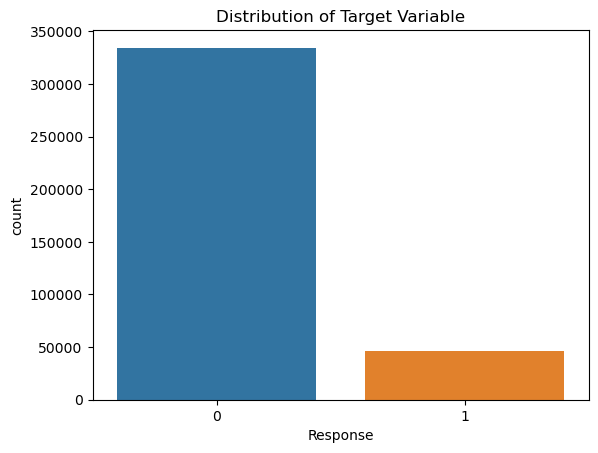

In [5]:
sns.countplot(x='Response', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

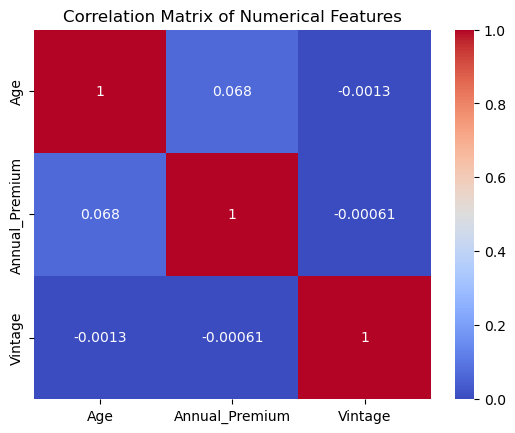

In [6]:
# Plot the correlation matrix of the numerical features
num_cols = ['Age', 'Annual_Premium', 'Vintage']
num_df = train_df[num_cols]
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

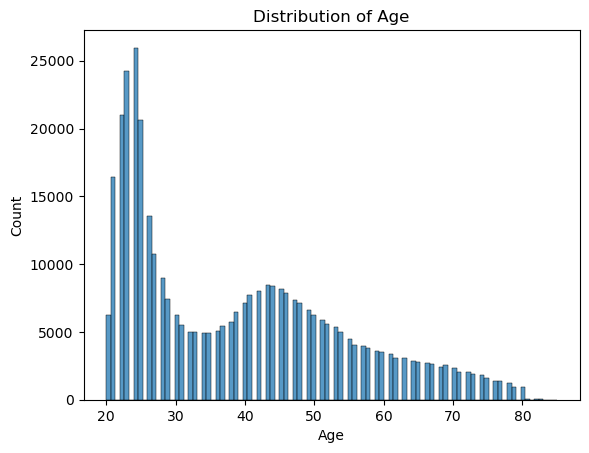

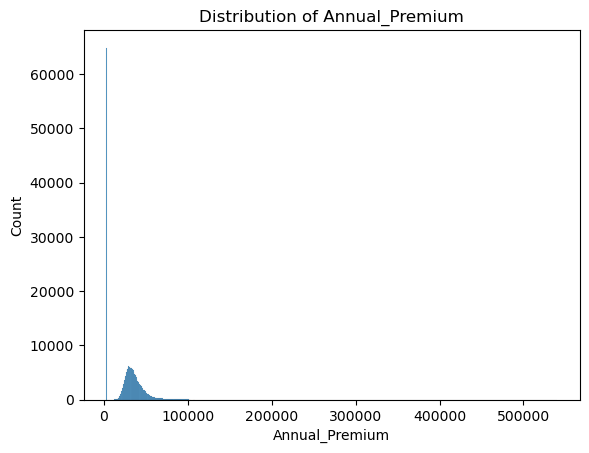

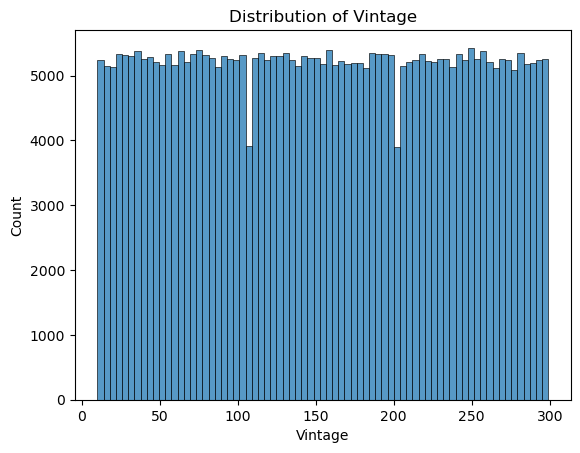

In [7]:
# Plot the distribution of the numerical features
for col in num_cols:
    sns.histplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.show()


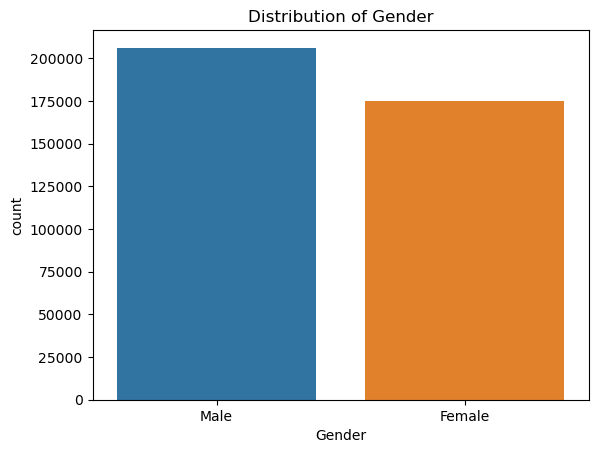

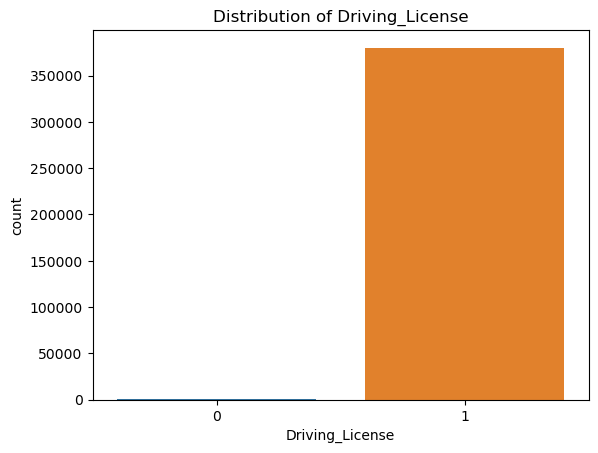

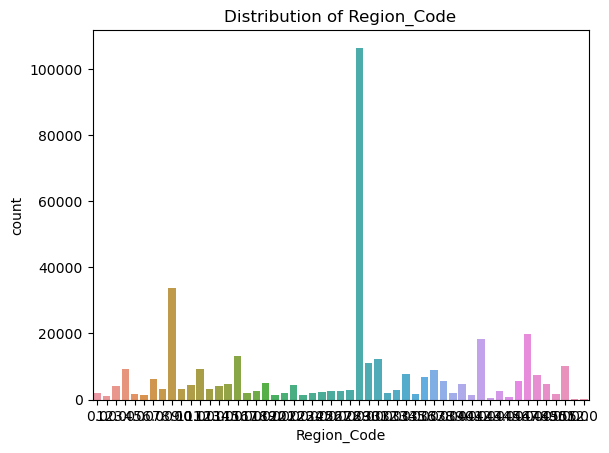

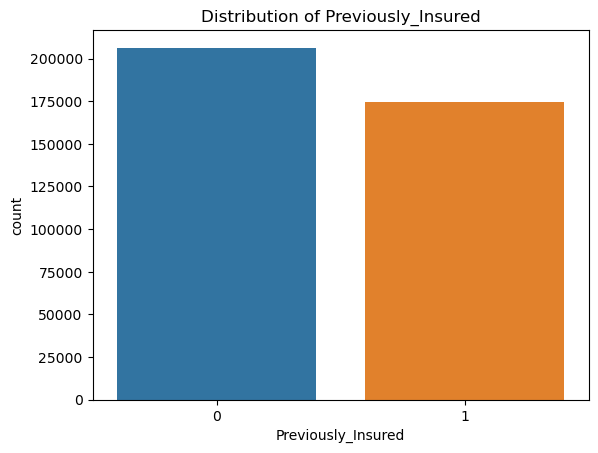

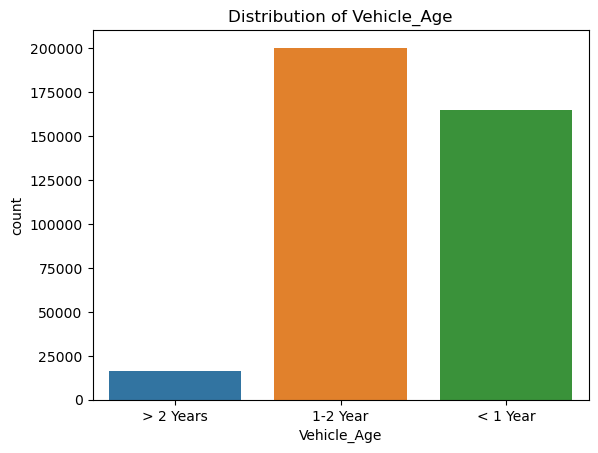

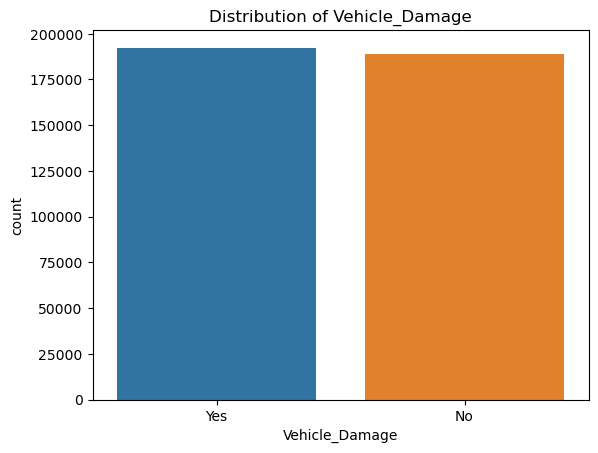

In [8]:
# Plot the distribution of the categorical features
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for col in cat_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
import warnings
# Ignore warning messages
warnings.filterwarnings('ignore')


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



In [11]:
# Load the data
train_df = pd.read_csv('/kaggle/input/insurancepredict/train.csv')
test_df=pd.read_csv('/kaggle/input/insurancepredict/test.csv')


In [12]:
# Separate features and target variable
X = train_df.drop(['id', 'Response'], axis=1)
y = train_df['Response']



In [13]:
# Encode categorical features
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test_df[col] = le.transform(test_df[col])



In [14]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train and evaluate multiple classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}



Decision Tree AUC score: 0.6009231836745883
Decision Tree accuracy score: 0.8213114323948466
Random Forest AUC score: 0.8368446089428418
Random Forest accuracy score: 0.8648946498386293
AdaBoost AUC score: 0.8544643404391168
AdaBoost accuracy score: 0.8750623179659416
XGBoost AUC score: 0.8591274962190434
XGBoost accuracy score: 0.8746687308126263
Logistic Regression AUC score: 0.8116391070545002
Logistic Regression accuracy score: 0.8729894256251476


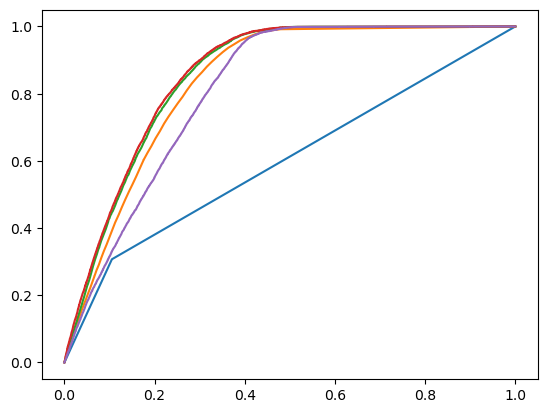

In [16]:
# Store the AUC scores for each model
auc_scores = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict_proba(X_val)[:, 1]
    
    # Evaluate the model using AUC and accuracy score
    auc_score = roc_auc_score(y_val, y_pred)
    acc_score = accuracy_score(y_val, model.predict(X_val))
    
    print(f'{name} AUC score: {auc_score}')
    print(f'{name} accuracy score: {acc_score}')
    
    auc_scores[name] = auc_score
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    plt.plot(fpr, tpr, label=name)



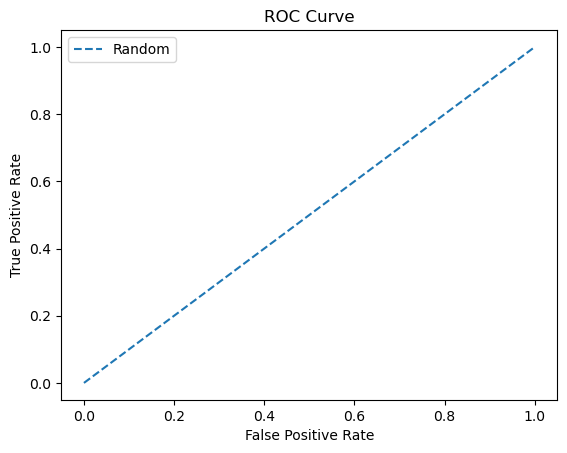


AUC scores:
XGBoost: 0.8591274962190434
AdaBoost: 0.8544643404391168
Random Forest: 0.8368446089428418
Logistic Regression: 0.8116391070545002
Decision Tree: 0.6009231836745883


In [17]:
# Plot ROC curves for all models in a single plot
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print the AUC scores for all models in decreasing order
auc_scores = dict(sorted(auc_scores.items(), key=lambda item: item[1], reverse=True))
print('\nAUC scores:')
for model, auc_score in auc_scores.items():
    print(f'{model}: {auc_score}')


## Based on the AUC scores provided, it looks like XGBoost and AdaBoost performed the best, with AUC scores of 0.859 and 0.854, respectively. Random Forest also had a respectable AUC score of 0.836, while Logistic Regression and Decision Tree had lower scores of 0.806 and 0.602, respectively.

## It's important to note that AUC is just one metric for evaluating the performance of a classification model, and it's always a good idea to consider other metrics as well, such as accuracy, precision, recall, and F1 score, depending on your specific use case and priorities